# This is the 3rd task of my internship at prodigy infotech.

## The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

# https://archive.ics.uci.edu/dataset/222/bank+marketing

## I have to create a decision tree.

# 1- Fixed the format and created a new csv files for better readability

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

bank = pd.read_csv('bank-full.csv', sep=';')

bank.to_csv('bank_test_data.csv', index=False)



C:\Users\CM-Ajk\AppData\Local\Temp\ipykernel_6820\3381179382.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
bank_additional = pd.read_csv('bank-additional-full.csv', sep=';')

bank_additional.to_csv('bank_additional_new.csv', index=False)
bank_additional.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [31]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
bank.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
1,44,29,5,151,1,-1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
2,33,2,5,76,1,-1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
3,47,1506,5,92,1,-1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
4,33,1,5,198,1,-1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False


In [7]:
subbed = bank[bank['y']=='yes']
subbed.to_csv('bank_y_subbed.csv', header=True)


In [8]:
unsubbed = bank[bank['y']=='no']
unsubbed.to_csv('bank_y_unsubbed.csv', header=True)

In [9]:
print(len(subbed),len(unsubbed), len(bank))
bank.shape

5289 39922 45211


(45211, 17)

In [10]:
subbed_add = bank_additional[bank_additional['y'] == 'yes']
unsubbed_add = bank_additional[bank_additional['y'] == 'no']
print(len(subbed_add),len(unsubbed_add),len(bank_additional))
bank_additional.shape

4640 36548 41188


(41188, 21)

In [11]:
columns_not_in_bank = bank_additional.columns.difference(bank.columns)
columns_not_in_bank

Index(['cons.conf.idx', 'cons.price.idx', 'day_of_week', 'emp.var.rate',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [12]:
bank_full = pd.read_csv('bank-full.csv', sep=';')
bank_full.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [13]:




print(bank.columns)

# Convert categorical variables into numerical representations using one-hot encoding
bank = pd.get_dummies(bank)

# Define features and target variable
y = bank['y_yes']
X = bank.drop(columns=['y_yes'])  # Exclude the target column


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeClassifier with default parameters
clf = DecisionTreeClassifier()

# Fit the classifier to your data
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Accuracy: 1.0


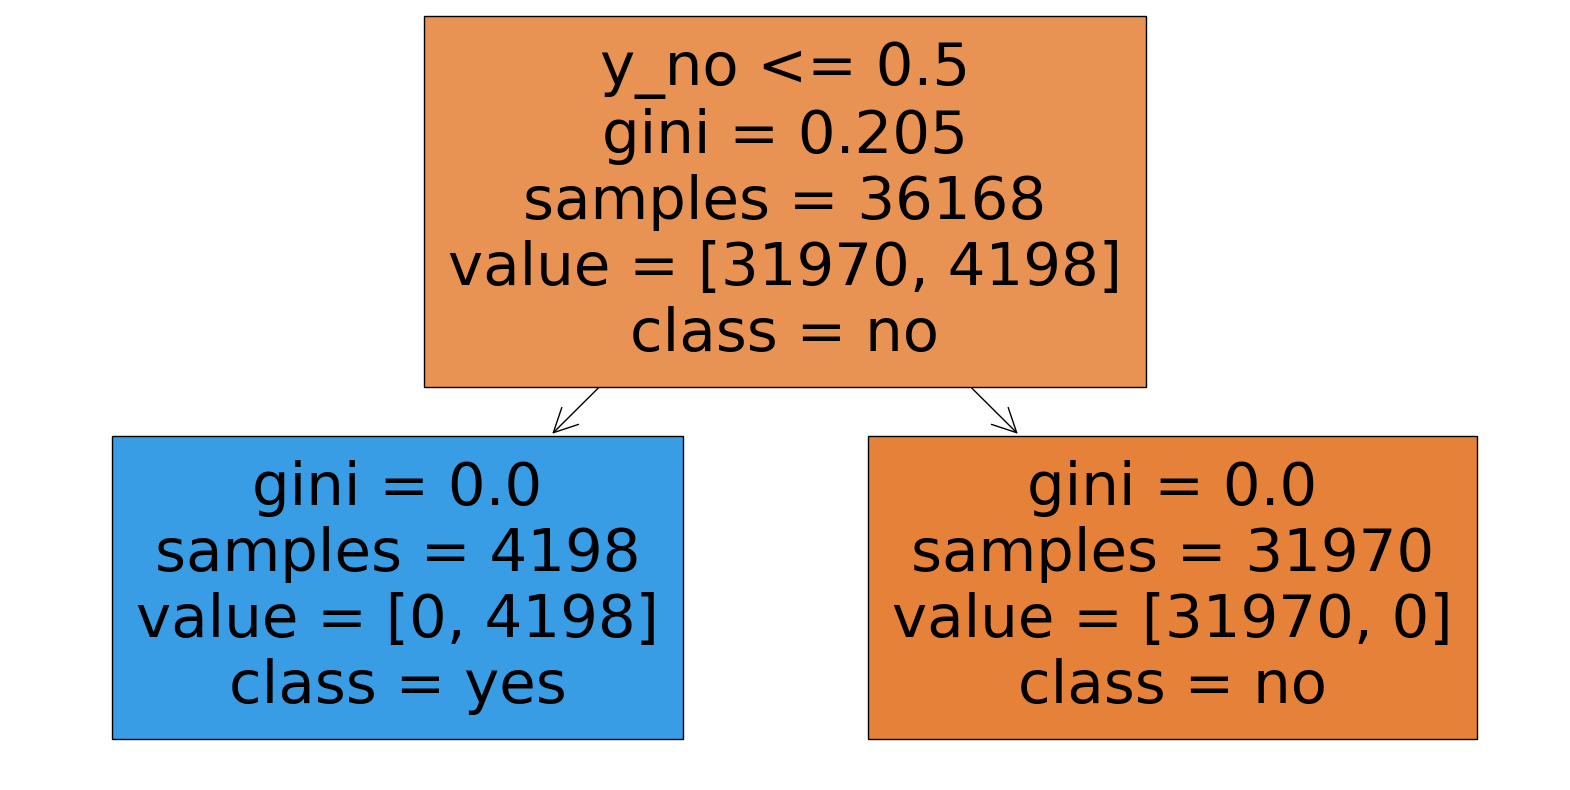

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X_test.columns, class_names=['no', 'yes'], filled=True)
plt.show()


In [15]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))


In [22]:
bank_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
gini_indices = []

for column in bank_full.columns:
    print(column)
    ginis = gini(bank_full[column])
    print(ginis)
    gini_indices.append((f"{column}" , ginis))
gini_indices

# AFTER SEARCHING FOR THI AND THAT AND TRYING TO FIND OUT HOW TO ACTUALLY DO THIS TASK I HAVE RECIEVED. I THINK I HAVE UNDERSTOOD IT.

In [30]:
convert_to_dummies = pd.get_dummies(bank)
convert_to_dummies.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
1,44,29,5,151,1,-1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
2,33,2,5,76,1,-1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
3,47,1506,5,92,1,-1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
4,33,1,5,198,1,-1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
